<a href="https://colab.research.google.com/github/jbakery/SQL-Example/blob/main/Stock_Market_Index_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to the Capstone 3 Notebook by Jaime Baker. 

This purposes of this analysis is to conduct a statistical T Test on German VS Chinese Stock index valuations and USA Vs Chinese Stock index valuations. 

The Data shows the prices in USD of various Stock Market indexes from around the world. For the purpose time, the Chinese stock market will be t tested against the German stock market index. 

The USA stock market index will be T tested against the Chinese stock Market Indext. 

If the Daily Averages are not statistically different then it can be a good multiplier for an investor. 

If the Daily Averages are statistically different then it can be a good diversifier for an investor helping mitigate risk. 



Summary:

USA and Chinese Stock Market Indexes has statistically insignificant differences in Daily Averages. This could be an investment multiplier risk on. 

German Stock Market Index have Statistically Signnificant differences in Daily Averages. This could be an investment diversifier leading to risk off in an investment portfolio. 


In [ ]:
#Local CSV File Upload

from google.colab import files
uploaded = files.upload()

Saving indexProcessed.csv to indexProcessed (3).csv


This code allows the upload of a local CSV File for data analysis. I used this function to upload the CSV downloaded from the Kaggel Website.

In [ ]:
#Saving the CSV as a Data Frame

import io
import pandas as pd


df2=pd.read_csv(io.BytesIO(uploaded['indexProcessed.csv']))

This line of code is saving the CVS do the Panda Data Frame with Varialble df2.

In [ ]:
#Taking a peak at the CSV Data and columns.

df2.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average,Region,Exchange,Currency
0,HSI,12/31/1986,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0,333.879006,2568.300049,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1/2/1987,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0,330.213013,2540.100098,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,1/5/1987,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0,331.811987,2552.399902,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,1/6/1987,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0,335.906987,2583.899902,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,1/7/1987,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0,338.923013,2607.100098,Hong Kong,Hong Kong Stock Exchange,HKD


Here I am using .head() method to take preview of the Data. The goal is to get a general idea and feel for the data. 

In [ ]:
#Describing Data Types

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Index          104224 non-null  object 
 1   Date           104224 non-null  object 
 2   Open           104224 non-null  float64
 3   High           104224 non-null  float64
 4   Low            104224 non-null  float64
 5   Close          104224 non-null  float64
 6   Adj Close      104224 non-null  float64
 7   Volume         104224 non-null  int64  
 8   CloseUSD       104224 non-null  float64
 9   Daily Average  104224 non-null  float64
 10  Region         104224 non-null  object 
 11  Exchange       104224 non-null  object 
 12  Currency       104224 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 10.3+ MB


Studying data attributes.

In [ ]:
#Curious about what it would look like

print(df2)

          Index        Date  ...                     Exchange  Currency
0           HSI  12/31/1986  ...     Hong Kong Stock Exchange       HKD
1           HSI    1/2/1987  ...     Hong Kong Stock Exchange       HKD
2           HSI    1/5/1987  ...     Hong Kong Stock Exchange       HKD
3           HSI    1/6/1987  ...     Hong Kong Stock Exchange       HKD
4           HSI    1/7/1987  ...     Hong Kong Stock Exchange       HKD
...         ...         ...  ...                          ...       ...
104219  J203.JO   5/25/2021  ...  Johannesburg Stock Exchange       ZAR
104220  J203.JO   5/26/2021  ...  Johannesburg Stock Exchange       ZAR
104221  J203.JO   5/27/2021  ...  Johannesburg Stock Exchange       ZAR
104222  J203.JO   5/28/2021  ...  Johannesburg Stock Exchange       ZAR
104223  J203.JO   5/31/2021  ...  Johannesburg Stock Exchange       ZAR

[104224 rows x 13 columns]


In [ ]:
# Descriptive stats Guide https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html

In [ ]:
# This Method is giving me the basic Decriptive Stats for the whole Data Frame

df2.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177,8012.952678
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623,9139.509759
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900,54.869999
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898,2047.554978
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598487,5771.112549
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241,10486.621340
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376170,68815.226570


This is the first step in the actual statistical analysis. I am using the describe method to get a general picture of how the data looks. 

Count tells me how many data point there are in each column. 

Mean is giving me the average value in each column.

Std = Standard Deviation is how far the data is distanced from the average. 

Min: is giving the minimum value in each column.

25% is the mean +- the standard deviation. 
50% is the mean +- two standard deviations. 
75% is the mean +- three standard devations. 

Max = is the maximum value in each column.





In [ ]:
#Just Playing Around Exploring

df2.value_counts

<bound method DataFrame.value_counts of           Index        Date  ...                     Exchange  Currency
0           HSI  12/31/1986  ...     Hong Kong Stock Exchange       HKD
1           HSI    1/2/1987  ...     Hong Kong Stock Exchange       HKD
2           HSI    1/5/1987  ...     Hong Kong Stock Exchange       HKD
3           HSI    1/6/1987  ...     Hong Kong Stock Exchange       HKD
4           HSI    1/7/1987  ...     Hong Kong Stock Exchange       HKD
...         ...         ...  ...                          ...       ...
104219  J203.JO   5/25/2021  ...  Johannesburg Stock Exchange       ZAR
104220  J203.JO   5/26/2021  ...  Johannesburg Stock Exchange       ZAR
104221  J203.JO   5/27/2021  ...  Johannesburg Stock Exchange       ZAR
104222  J203.JO   5/28/2021  ...  Johannesburg Stock Exchange       ZAR
104223  J203.JO   5/31/2021  ...  Johannesburg Stock Exchange       ZAR

[104224 rows x 13 columns]>

In [ ]:
# I want to T Test Germany VS China, and USA VS China
#I had to figure out how to filter for those countries. 

#Hypopthesis: The German stock exchange index prices move with the Chinese stock exchange.
#Null Hypothesis The German stock exchange index prices do not move with the Chinese stock exchange.


import numpy as np
import pandas as pd

df2.query('Region == "Germany" ')

#Saving Germany filter data as a data frame so I can call it
df_germany=df2
dfg=df2.query('Region == "Germany" ')

#Exploring to make sure the filter didnt change the column

dfg.head()



,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average,Region,Exchange,Currency
79900,GDAXI,12/30/1987,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,1226.331802,1005.190002,Germany,Frankfurt Stock Exchange,EUR
79901,GDAXI,1/4/1988,956.489990,956.489990,956.489990,956.489990,956.489990,0,1166.917788,956.489990,Germany,Frankfurt Stock Exchange,EUR
79902,GDAXI,1/5/1988,996.099976,996.099976,996.099976,996.099976,996.099976,0,1215.241971,996.099976,Germany,Frankfurt Stock Exchange,EUR
79903,GDAXI,1/6/1988,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,1227.332212,1006.010010,Germany,Frankfurt Stock Exchange,EUR
79904,GDAXI,1/7/1988,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,1237.653365,1014.469971,Germany,Frankfurt Stock Exchange,EUR


Hypothesis: The German stock exchange index prices do not move with the Chinese stock exchange.
Null Hypothesis The German stock exchange index prices move with the Chinese stock exchange.

Here I am starting the Statistical T Test. The issue is that the data is aggregated and unfiltered. I want to isolate all **values for Region Germany **so I can do a T - TEST of Germany Vs China. 

So I use the .query method

After doing the query I save the Data Frame into a different variable dfg so I can access **the** results easily in the future.

In [ ]:
#Germany Describe Data

from google.colab import files
dfg.describe().to_csv("testg.csv")
files.download('testg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Getting Descriptive Stats on Germany

dfg.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average
count,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8.438000e+03,8438.000000,8438.000000
mean,5915.549220,5956.941632,5869.720949,5914.846717,5914.846717,6.830384e+07,7216.112995,5913.331291
std,3649.999809,3671.929430,3625.892186,3649.624493,3649.624493,6.475934e+07,4452.541882,3648.765465
min,936.000000,936.000000,936.000000,936.000000,936.000000,0.000000e+00,1141.920000,936.000000
25%,2513.420044,2530.242431,2492.747559,2513.614990,2513.614990,0.000000e+00,3066.610289,2512.447510
50%,5404.735107,5453.320069,5352.900147,5401.109863,5401.109863,7.312590e+07,6589.354033,5399.382447
75%,7916.622436,7965.574951,7859.397461,7920.977417,7920.977417,1.068676e+08,9663.592448,7915.771241
max,15548.290040,15568.599610,15465.089840,15519.980470,15519.980470,5.101956e+08,18934.376170,15516.844730


In this step in the statistical analysis. I am using the describe method to get a general picture of how the data looks for Region Germany.

Count tells me how many data point there are in each column.

Mean is giving me the average value in each column.

Std = Standard Deviation is how far the data is distanced from the average.

Min: is giving the minimum value in each column.

25% is the mean +- the standard deviation. 50% is the mean +- two standard deviations. 75% is the mean +- three standard devations.

Max = is the maximum value in each column.

In [ ]:
# Doing the same thing for the USA

df2.query('Region == "United States" ')

dfu=df2.query('Region == "United States" ')

dfu.head()



,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average,Region,Exchange,Currency
8492,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0,528.690002,528.690002,United States,New York Stock Exchange,USD
8493,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0,527.210022,527.210022,United States,New York Stock Exchange,USD
8494,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0,527.840027,527.840027,United States,New York Stock Exchange,USD
8495,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0,531.119995,531.119995,United States,New York Stock Exchange,USD
8496,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0,532.070007,532.070007,United States,New York Stock Exchange,USD


Hypothesis: The Chinese stock exchange index does not move with the New York stock exchange valuations.

Null Hypothesis The Chinese stock exchange index moves with the New York stock exchange valuations.

Here I am starting the Statistical T Test. The issue is that the data is aggregated and unfiltered. I want to isolate all *values for Region USA *so I can do a T - TEST of USA Vs China.

So I use the .query method

After doing the query I save the Data Frame into a different variable dfg so I can access the results easily in the future.

In [ ]:
#Getting Descriptive Stats for the USA

dfu.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average
count,26637.000000,26637.000000,26637.000000,26637.000000,26637.000000,2.663700e+04,26637.000000,26637.000000
mean,3276.605549,3291.427464,3259.971029,3276.755938,3276.755938,1.108833e+09,3276.755938,3275.699246
std,3629.002232,3646.806561,3609.262895,3629.405774,3629.405774,1.537763e+09,3629.405774,3627.959471
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,54.869999,54.869999
25%,547.510010,547.609985,547.080017,547.510010,547.510010,0.000000e+00,547.510010,547.510010
50%,1804.939941,1811.599976,1789.719971,1803.880005,1803.880005,1.307000e+08,1803.880005,1804.769959
75%,5428.979980,5460.910156,5398.950195,5429.080078,5429.080078,1.918690e+09,5429.080078,5425.280029
max,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690,1.145623e+10,16590.429690,16601.345710


In this step in the statistical analysis. I am using the describe method to get a general picture of how the data looks for Region USA.

Count tells me how many data point there are in each column.

Mean is giving me the average value in each column.

Std = Standard Deviation is how far the data is distanced from the average.

Min: is giving the minimum value in each column.

25% is the mean +- the standard deviation. 50% is the mean +- two standard deviations. 75% is the mean +- three standard devations.

Max = is the maximum value in each column.

In [ ]:
#USA Describe Download

from google.colab import files
dfu.describe().to_csv("testu.csv")
files.download('testu.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#China Filter

df2.query('Region == "China" ')

#df_china=df2[df2['Region']='China']

dfc=df2.query('Region == "China" ')

dfc.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average,Region,Exchange,Currency
35129,000001.SS,7/2/1997,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0,191.849766,1204.451050,China,Shanghai Stock Exchange,CNY
35130,000001.SS,7/3/1997,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0,184.099687,1172.307983,China,Shanghai Stock Exchange,CNY
35131,000001.SS,7/4/1997,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0,185.494727,1144.012512,China,Shanghai Stock Exchange,CNY
35132,000001.SS,7/7/1997,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0,175.491035,1124.509521,China,Shanghai Stock Exchange,CNY
35133,000001.SS,7/8/1997,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0,177.546563,1090.738464,China,Shanghai Stock Exchange,CNY


Both my T test involve the China so I need to filter the china values and isolate them for the T test. 

I save the results in a new data frame dfc. 


In [ ]:
#Descriptive Stats for China

dfc.describe()


,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average
count,11551.000000,11551.000000,11551.000000,11551.000000,11551.000000,1.155100e+04,11551.000000,11551.000000
mean,5167.277422,5219.930971,5113.077501,5170.947965,5170.911890,1.780912e+05,827.351674,5166.504236
std,4004.673623,4051.749253,3954.367837,4007.675694,4007.635821,3.775214e+05,641.228111,4002.791971
min,1007.901001,1019.921997,998.228027,1011.499023,1011.499023,0.000000e+00,161.839844,1010.221985
25%,2254.376953,2276.542968,2234.662476,2261.177490,2261.177490,0.000000e+00,361.788398,2253.542725
50%,3279.379883,3306.060059,3254.611084,3280.839111,3280.839111,7.080000e+04,524.934258,3280.015015
75%,8362.604981,8444.854981,8276.155274,8367.310058,8367.216308,1.442500e+05,1338.769609,8359.842651
max,19554.580080,19600.029300,19203.109380,19531.150390,19530.931640,1.006520e+07,3124.984062,19396.899420


In [ ]:
#Export Function

from google.colab import files
dfc.describe().to_csv("test.csv")
files.download('test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In this step in the statistical analysis. I am using the describe method to get a general picture of how the data looks for Region China.

Count tells me how many data point there are in each column.

Mean is giving me the average value in each column.

Std = Standard Deviation is how far the data is distanced from the average.

Min: is giving the minimum value in each column.

25% is the mean +- the standard deviation. 50% is the mean +- two standard deviations. 75% is the mean +- three standard devations.

Max = is the maximum value in each column.

In [ ]:
#Pulling Daily USD Averages for Comparison

dfc['Daily Average']

35129     1204.451050
35130     1172.307983
35131     1144.012512
35132     1124.509521
35133     1090.738464
             ...     
66023    14837.984870
66024    14878.035160
66025    14916.265140
66026    14929.879880
66027    14922.475100
Name: Daily Average, Length: 11551, dtype: float64

Here I am printing daily averages to try and make sure the data looks good.

In [ ]:
#Pulling Daily USD Averages for Comparison

dfg['Daily Average']

79900     1005.190002
79901      956.489990
79902      996.099976
79903     1006.010010
79904     1014.469971
             ...     
88333    15516.844730
88334    15474.670410
88335    15420.364750
88336    15492.229980
88337    15457.009770
Name: Daily Average, Length: 8438, dtype: float64

Here I am printing daily averages to try and make sure the data looks good.

In [ ]:
#Pulling Daily USD Averages for Comparison

dfu['Daily Average']

8492       528.690002
8493       527.210022
8494       527.840027
8495       531.119995
8496       532.070007
             ...     
35124    13629.929690
35125    13691.469730
35126    13714.875000
35127    13739.074710
35128    13784.240240
Name: Daily Average, Length: 26637, dtype: float64

Here I am printing daily averages to try and make sure the data looks good.

In [ ]:
#Running T test between Chinese Stock exchange and German Stock Exchange to attempt to determine if there a radical difference in means. 

import scipy

from scipy import stats

scipy.stats.ttest_ind(dfc['Daily Average'], dfg['Daily Average'])

Ttest_indResult(statistic=-13.519763156601389, pvalue=1.819487346114327e-41)

Hypopthesis:The German stock exchange index prices do not move with the Chinese stock exchange.

Null Hypothesis The German stock exchange index prices move with the Chinese stock exchange.

In [ ]:
#Confidence Interval Chinese Stock Exchange VS German Stock Exchange

# Calculate the sample size, mean, and variance of each sample.
# You will need this information to calculate standard errors.

sample_1_n = dfc.shape[0]
sample_2_n = dfg.shape[0]
sample_1_mean = dfc['Daily Average'].mean()
sample_2_mean = dfg['Daily Average'].mean()
sample_1_var = dfc['Daily Average'].var()
sample_2_var = dfg['Daily Average'].var()

# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print('There is a significant difference between sample means. The Null Hypothesis is rejected. There is a radical difference in population means. ')
print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")


#Conclusion

#There is a significant difference between sample means. The Null Hypothesis is rejected. There is a difference in population means. 
# The difference is significant at the 0.95 confidence interval level. With 95% confidence, the difference is between 640.1033477441739  and 853.5507616162071 
#difference in means. 

There is a significant difference between sample means. The Null Hypothesis is rejected. There is a radical difference in population means. 
The difference in means at the 95% confidence interval is between 640.1033477441739 and 853.5507616162071.


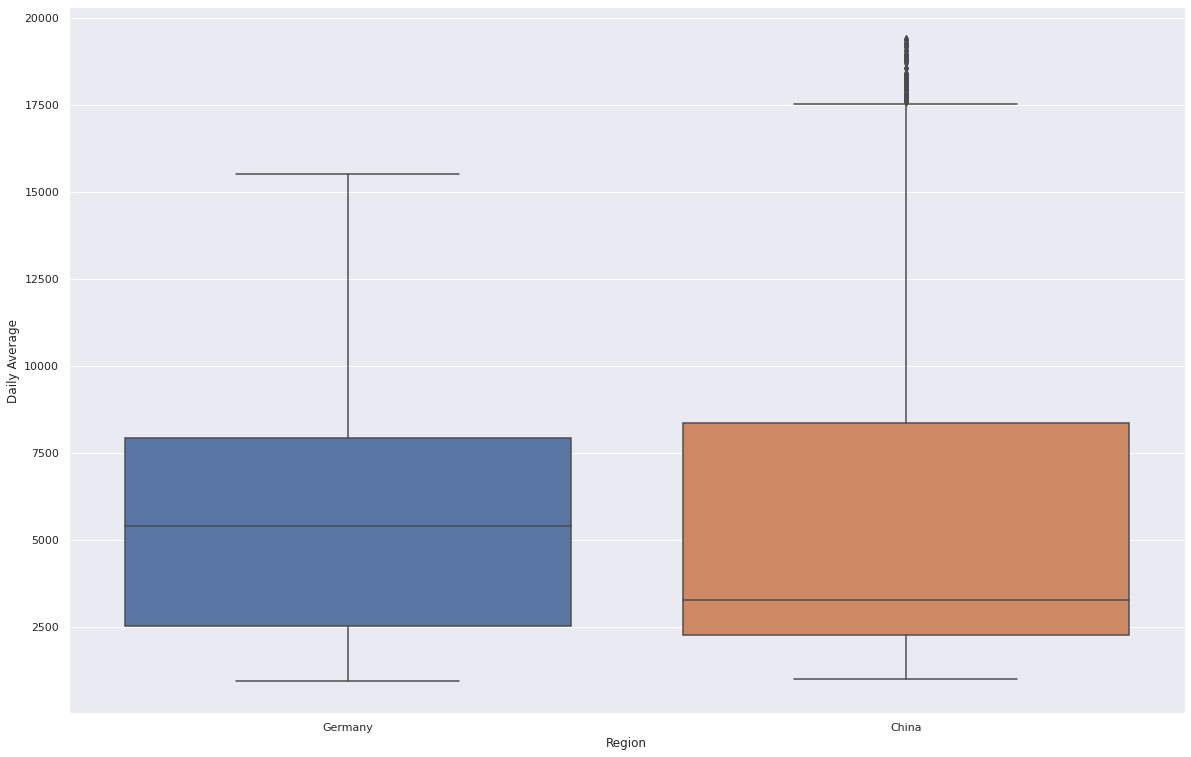

In [ ]:
# T test Box Plot with Error Bars China Vs Germany 

import seaborn as sns

df_outercg = pd.concat([dfg, dfc]) 

sns.boxplot(x='Region', y='Daily Average', data=df_outercg)



This Test means the German and Chinese stock exchange valuations are very different. The data point chosen was Daily Average. Daily Average is the average between the  daily High and Low. 


In [ ]:
#Running T test between Chinese Stock exchange and USA Stock Exchange to attempt to determine if there a radical difference in means. 

import scipy
from scipy import stats

scipy.stats.ttest_ind(dfc['Daily Average'], dfu['Daily Average'])


Ttest_indResult(statistic=45.31582558493812, pvalue=0.0)

Hypopthesis: The Chinese stock exchange index does not move with the New York stock exchange valuations.

Null Hypothesis The Chinese stock exchange index moves with the New York stock exchange valuations.

In [ ]:
#Confidence Interval Chinese Stock Exchange VS German Stock Exchange

# Calculate the sample size, mean, and variance of each sample.
# You will need this information to calculate standard errors.

sample_1_n = dfc.shape[0]
sample_2_n = dfu.shape[0]
sample_1_mean = dfc['Daily Average'].mean()
sample_2_mean = dfu['Daily Average'].mean()
sample_1_var = dfc['Daily Average'].var()
sample_2_var = dfu['Daily Average'].var()

# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error



print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -1975.8162227549606 and -1805.7937573526156.


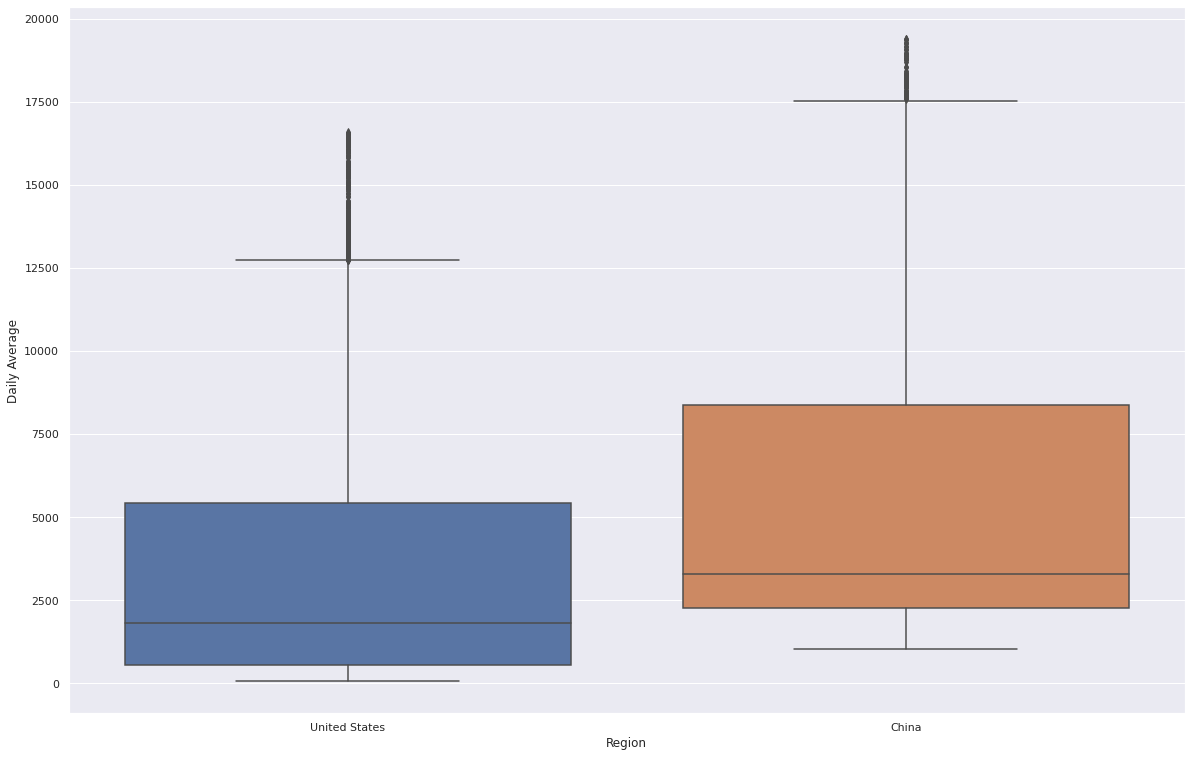

In [ ]:
import seaborn as sns

df_outercu = pd.concat([dfu, dfc])

sns.boxplot(x='Region', y='Daily Average', data=df_outercu)


Here I combined the US stock market index data frame with the Chinese stock market index data frame 

There is not a significant difference between sample means. The Null Hypothesis is rejcted. There is a significant difference in population means. The difference in means at the 95% confidence interval is between -1975.8162227549606 and -1805.7937573526156.


Hypopthesis: The Chinese stock exchange index does not move with the New York stock exchange valuations.

Null Hypothesis The Chinese stock exchange index moves with the New York stock exchange valuations.

In [ ]:
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

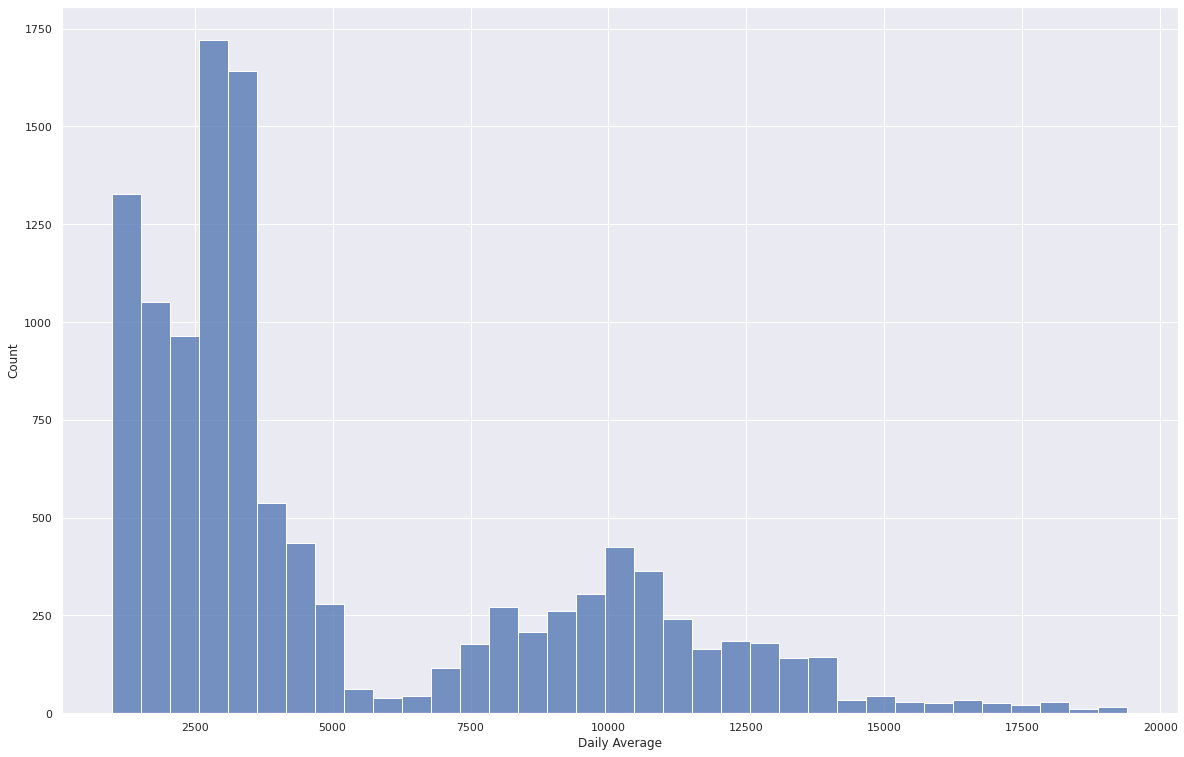

In [ ]:
#Histogram of Chinese Stock Market Data. Not a normal Distribution.

ax = sns.histplot(dfc['Daily Average'])

sns.set(rc = {'figure.figsize':(20,13)})


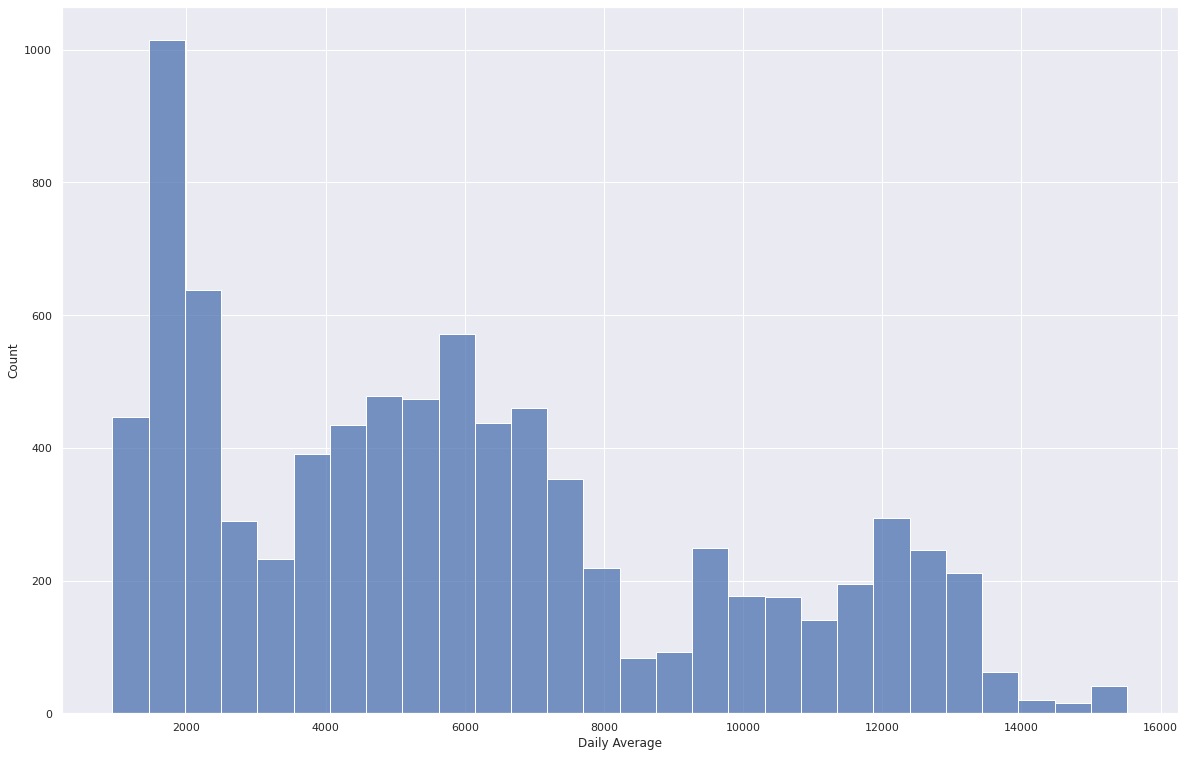

In [ ]:
#Histogram of German Stock Market Data. Not a normal Distribution.


ax = sns.histplot(dfg['Daily Average'])

sns.set(rc = {'figure.figsize':(20,13)})


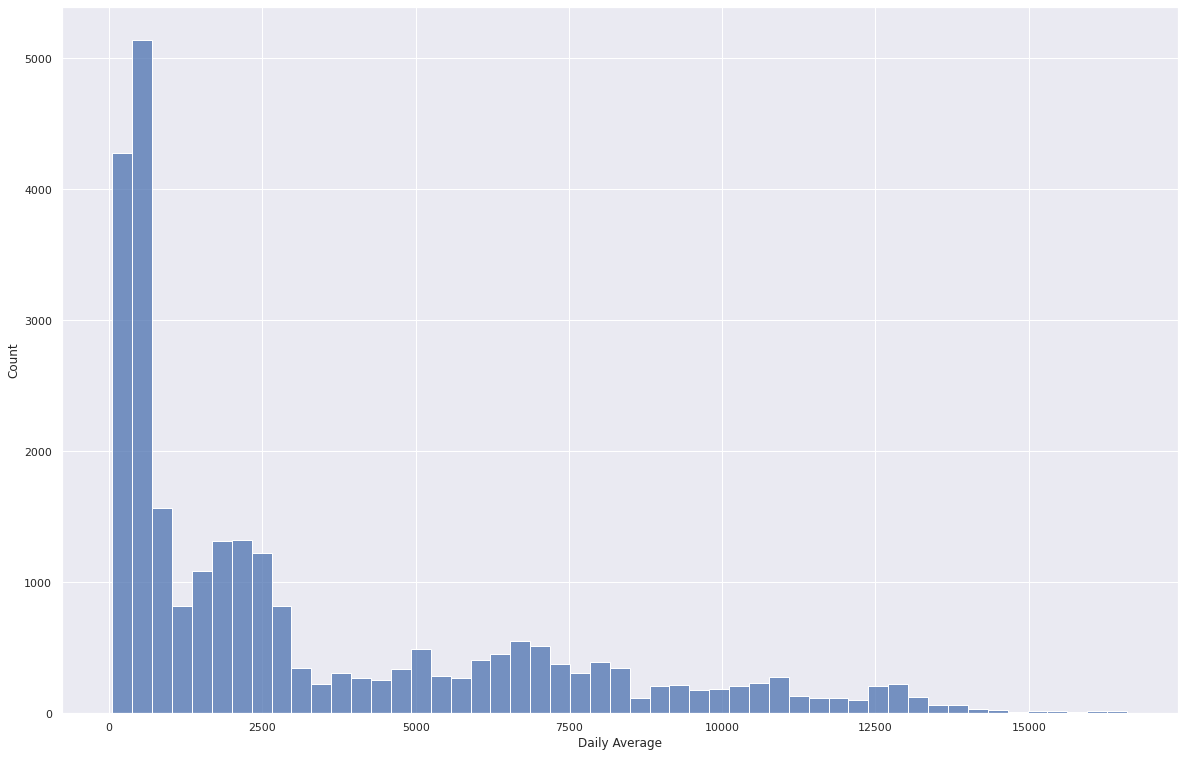

In [ ]:
#Histogram of USA Stock Market Data. Not a normal Distribution.


ax = sns.histplot(dfu['Daily Average'])

sns.set(rc = {'figure.figsize':(20,13)})


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#Export function

from google.colab import files
df2.to_csv('filename2.csv') 
files.download('filename2.csv')

In [ ]:
dfc.head()


,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Average,Region,Exchange,Currency
35129,000001.SS,7/2/1997,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0,191.849766,1204.451050,China,Shanghai Stock Exchange,CNY
35130,000001.SS,7/3/1997,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0,184.099687,1172.307983,China,Shanghai Stock Exchange,CNY
35131,000001.SS,7/4/1997,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0,185.494727,1144.012512,China,Shanghai Stock Exchange,CNY
35132,000001.SS,7/7/1997,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0,175.491035,1124.509521,China,Shanghai Stock Exchange,CNY
35133,000001.SS,7/8/1997,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0,177.546563,1090.738464,China,Shanghai Stock Exchange,CNY


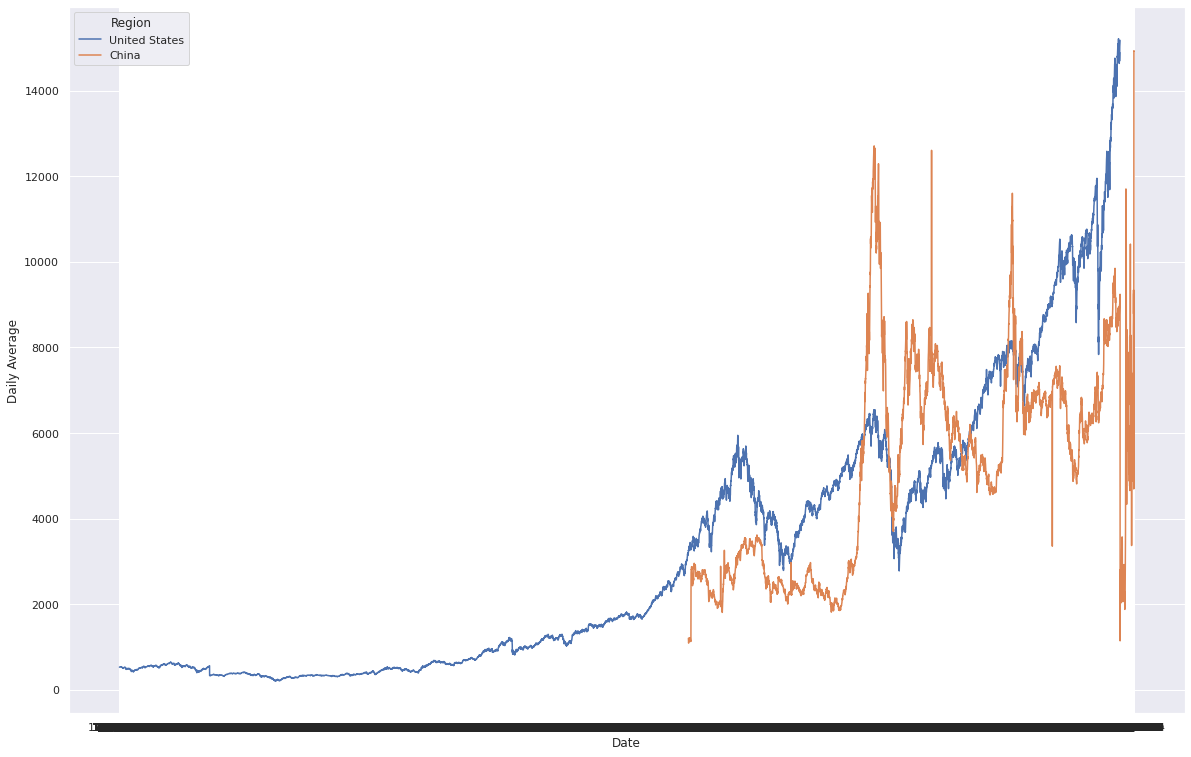

In [ ]:
 
ax = sns.lineplot(data=df_outercu, x="Date", y="Daily Average", ci=None, hue='Region')


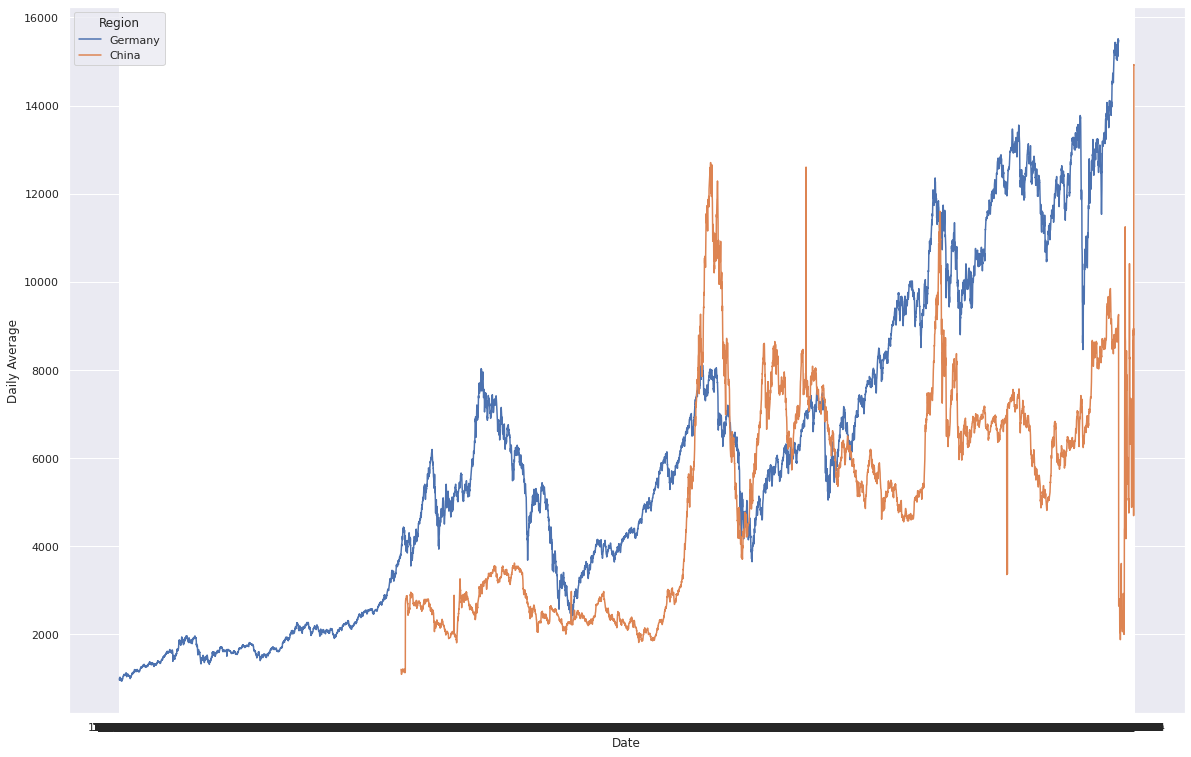

In [ ]:
ax = sns.lineplot(data=df_outercg, x="Date", y="Daily Average", ci =None, hue='Region')


Recommendation: Investment strategies depend on what the investment managers are looking for. If you are making an investment into the Chinese Stock Market index a good diversification strategy would be to buy the German Stock Market Index, and USA Stock Market Index. This option is good for the investor wanting to make steady returns and take very little risk.  